<font size="6"><b>LOG ODDS AND MAXIMUM LIKELIHOOD ESTIMATION</b></font>

In [ ]:
library(tidyverse)
library(data.table)
library(e1071)

In [ ]:
options(repr.matrix.max.rows=20, repr.matrix.max.cols=15) # for limiting the number of top and bottom rows of tables printed 

In [ ]:
datapath <- "~/databb"

Let's first create some 0 and 1 values as response variables

In [ ]:
logistic_dt <- data.table(responsex = sample(0:1, 20, replace = T))

Create some random probability values close to response:

In [ ]:
logistic_dt[, probx := rbeta(.N, 1 + responsex, 2 - responsex)]

In [ ]:
logistic_dt[, as.list(summary(probx)), by = responsex]

Now let's calculate the odd ratios: Ratio of probabilities to their complements to 1:

In [ ]:
logistic_dt[, oddsx := probx / (1 - probx)]

And their log values:

In [ ]:
logistic_dt[, logoddx := log(oddsx)]

In [ ]:
logistic_dt

How can we get to the original probability values using the log odds? With the logistic function:

$${\displaystyle f(x)={\frac {1}{1+e^{-x}}}}$$

We can hard code a new function or use the built-in sigmoid function from e1071 package. The function creates the sigmoid curve (S-curve)

In [ ]:
curve(sigmoid, -5, 5)

In [ ]:
logistic_dt[, probx2 := sigmoid(logoddx)]

In [ ]:
logistic_dt

probx shows the probability that the response will be 1. For the cases of 0 valued responses, its complement to 1 should be taken:

In [ ]:
logistic_dt[, probres := ifelse(responsex == 1, probx, 1 - probx)]

In [ ]:
logistic_dt

The total likelihood of the data given the probabilities is the product of all the probres values:

- So for 1 responses probabilities
- For 0 responses complement of probabilities

are multiplied

In [ ]:
logistic_dt[, prod(probres)]

However for large data this will give a too small value below the max precision

We can take the log of probres and sum it:

In [ ]:
logistic_dt[, logprobres := log(probres)]

In [ ]:
logistic_dt

In [ ]:
logistic_dt[, sum(logprobres)]

That's the likelihood value that we want to maximize

Newton raphson method is used in order to get the optimal value:

At an extrema point the slope of a curve becomes 0:

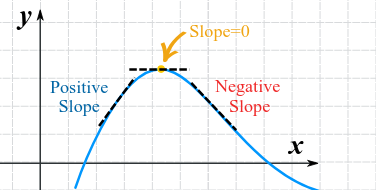

(https://www.mathsisfun.com/calculus/maxima-minima.html)

So the main task is to find the root (the x value where y becomes 0) of the slope or the first derivative or the gradient of the maximum likelihood function.

We can start at an arbitrary value at the curve of the first derivative:

- Draw a tangent line to the derivative curve,
- Get the point where the tangent intersects the x axis
- And get to the y point of that x coordinate on the derivative curve
- Repoeat the above 3 steps until the y value on the curve converges to 0.
- The final x value is the root of the derivative curve - where it becomes 0 - and also the point where the original curve reaches its extrema

![newton-raphson](../imagesbb/newton_raphson.gif)

(https://medium.com/@ruhayel/an-intuitive-and-physical-approach-to-newtons-method-86a0bd812ec3)